# A. Train and Test sets

In [ ]:
# To fairly assess the score, we need to split the data into training and test sets.
# Input data
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] # Creating a 2D list.
fish_target = [1] * 35 + [0] * 14  # 49 samples: 35 for training, 14 for testing.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()  # Import the KNeighborsClassifier class and create an object.

print(fish_data[4])  # Access the 5th item.
print(fish_data[:5])  # Access items from 0 to 4.
print(fish_data[44:])  # Access items from index 44 to the end.

[29.0, 430.0]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
train_input = fish_data[:35]  # Training set input
train_target = fish_target[:35]  # Training set target

test_input = fish_data[35:]  # Test set input
test_target = fish_target[35:]

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

# The score is 0?? Why such poor performance? The data is not evenly distributed! The last 14 samples contain no smelt. How can you train like that?
# Sampling bias > Solution: NumPy.
# What is NumPy? Let's use it to shuffle the data properly.

0.0

In [ ]:
import numpy as np

input_arr = np.array(fish_data)  # Convert the list to a NumPy array using the array() function.
target_arr = np.array(fish_target)

print(input_arr)  # Easier to read, right?
print(target_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(input_arr.shape)  # Check the shape of the array.

(49, 2)


In [ ]:
np.random.seed(42)  # Set random seed to 42
index = np.arange(49)  # Generate an array from 0 to 48 using arange()

np.random.shuffle(index)  # Shuffle the index array.
print(index)  # The array is well shuffled, starting with 13!

# %% [code]
print(input_arr[[1, 3]])  # Print samples at index 1 and 3.

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]
[[ 26.3 290. ]
 [ 29.  363. ]]


In [ ]:
train_input = input_arr[index[:35]]  # First 35 samples for training data.
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])  # Yes, they match! The first index is 13.

test_input = input_arr[index[35:]]  # Last 14 samples for test data.
test_target = target_arr[index[35:]]

[ 32. 340.] [ 32. 340.]


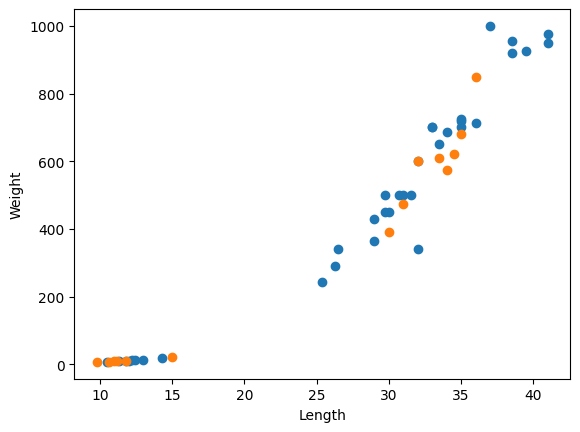

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()  # Now it’s properly shuffled!

In [ ]:
kn.fit(train_input, train_target)  # Train the model.
kn.score(test_input, test_target)  # 100% accuracy.

1.0

In [ ]:
kn.predict(test_input)  # Make predictions.

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_target  # Check the actual test target.

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# B. Data Preprocessing

In [ ]:
# Let's load the code and concatenate the data.
# Input data
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [ ]:
import numpy as np
np.column_stack(([1, 2, 3], [4, 5, 6]))  # Stack the arrays into a 2x3 matrix.

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))  # Stack length and weight.
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
print(np.ones(5))  # Create an array of five ones.
fish_target = np.concatenate((np.ones(35), np.zeros(14)))  # Concatenate the target array.

[1. 1. 1. 1. 1.]


## Splitting the data into training and test sets using Scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split  # Function to split data
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)  # Split with a random seed of 42.

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)  # Was it shuffled well?

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


* fish_data > train_input, test_input

* fish_target > train_input, test_input

* Training data: 36 samples, Test data: 13 samples.


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)  # Use stratify to maintain the class ratio.
print(test_target)  # Now the ratio is correct!

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## KNN Practice: Suspicious bream fish

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)  # Perfect score.

1.0

In [ ]:
print(kn.predict([[25, 150]]))  # What? It's a smelt? Let's investigate. # Let's find the reason!

[0.]


Text(0, 0.5, 'Weight')

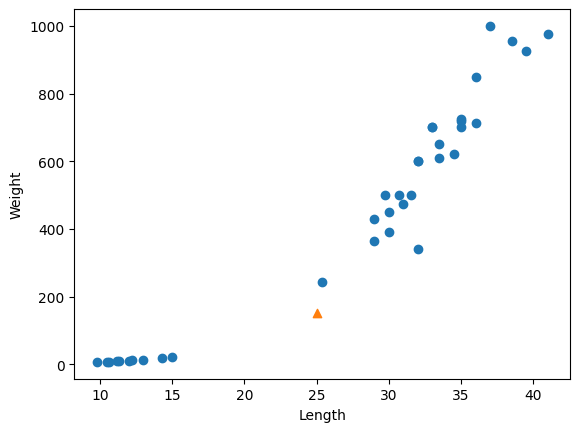

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')  # Add a marker for the suspicious fish.
plt.xlabel('Length')
plt.ylabel('Weight')  # Visually, it looks closer to a bream.

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])  # Find the 5 nearest neighbors.

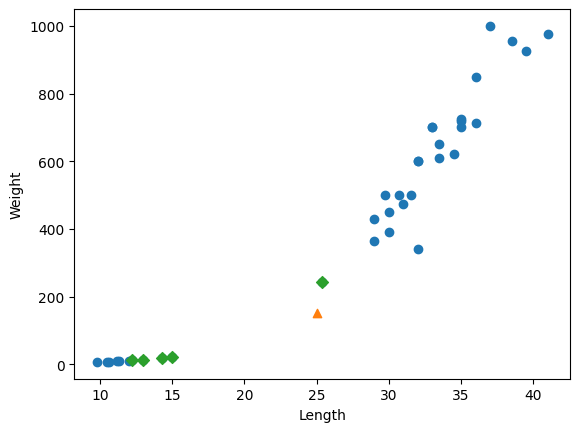

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')  # Show the nearest neighbors as diamonds.
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [ ]:
print(train_input[indexes])  # Print the nearest neighbors' data.

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexes])  # See the labels of the nearest neighbors. Four of them are smelt (0).

[[1. 0. 0. 0. 0.]]


In [ ]:
# But it’s also close to some bream... What’s the issue?
print(distances)  # The distances vary because the x and y axes have different scales.

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


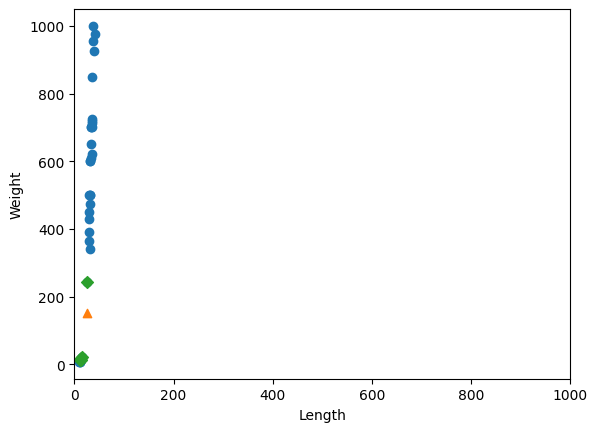

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')  # Show the nearest neighbors.
plt.xlim(0, 1000)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()  # It's due to the scale difference!

## Data Preprocessing: Standardize the scales to prevent distances from being skewed.
* The best preprocessing method is standardization (z-score).

In [ ]:
mean = np.mean(train_input, axis=0)  # Calculate the mean.
std = np.std(train_input, axis=0)  # Calculate the standard deviation.

print(mean, std)


[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
# Standardize the training data.
train_scaled = (train_input - mean) / std


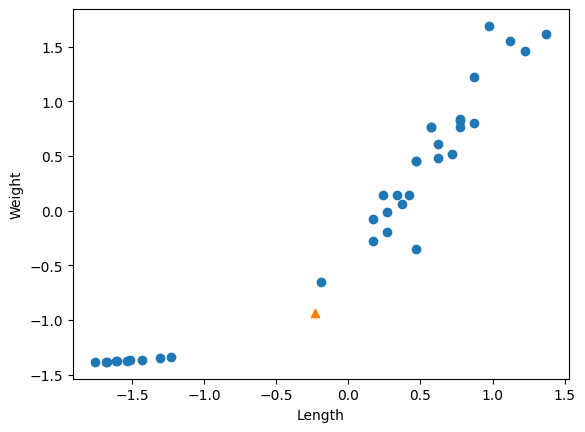

In [ ]:
new = ([25, 150] - mean) / std  # Standardize the new fish's data.
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')  # Add the standardized fish.
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()  # The plot looks almost the same as before standardization.


In [ ]:
kn.fit(train_scaled, train_target)  # Train the model with standardized data.

test_scaled = (test_input - mean) / std  # Standardize the test data.
kn.score(test_scaled, test_target)  # Perfect score.


1.0

In [ ]:
print(kn.predict([new]))  # Finally, it correctly predicts the bream (1). This is because we standardized the features.


[1.]


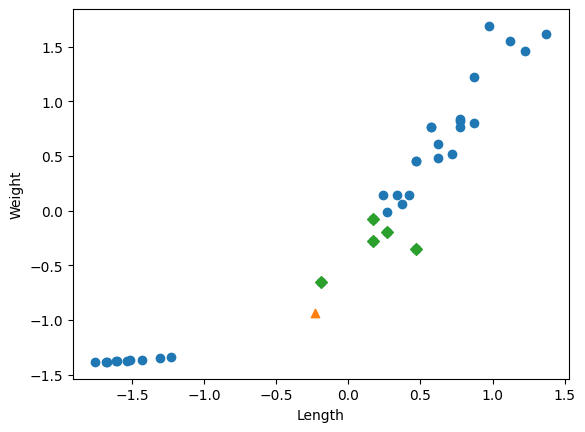

In [ ]:
distances, indexes = kn.kneighbors([new])  # Find the nearest neighbors of the new fish.
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()  # The plot has changed because we standardized the features.


* Why was the sample prediction wrong before?
* Cause: The length and weight scales were different.
* Solution: We standardized the features!